## Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

#### Martin Reilly

#### %matplotlib inline tells the notebook to put any plots in the notebook itself rather that in seperate windows
###### Also changing the style of the plots away from the default %matplotlib style to 'seaborn', note defaults will return once you restart Jupyter Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from fremont_packages.data import get_fremont_data

# import fremont_packages
# fremont_packages.x

# import os
# from urllib.request import urlretrieve
# 
# import pandas as pd
# 
# URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
# 
# def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
#     if force_download or not os.path.exists(filename):
#         urlretrieve(url, filename)
#     data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
#     data.columns = ['East', 'West']
#     data['Total'] = data['West'] + data['East']
#     return data

In [3]:
data = get_fremont_data()

data.head()

,East,West,Total
Date,,,
2019-01-31 11:00:00,7.0,6.0,13.0
2019-01-31 10:00:00,13.0,16.0,29.0
2019-01-31 09:00:00,18.0,27.0,45.0
2019-01-31 08:00:00,32.0,33.0,65.0
2019-01-31 07:00:00,40.0,94.0,134.0


In [4]:
data.index

DatetimeIndex(['2019-01-31 11:00:00', '2019-01-31 10:00:00',
               '2019-01-31 09:00:00', '2019-01-31 08:00:00',
               '2019-01-31 07:00:00', '2019-01-31 06:00:00',
               '2019-01-31 05:00:00', '2019-01-31 04:00:00',
               '2019-01-31 03:00:00', '2019-01-31 02:00:00',
               ...
               '2012-10-03 09:00:00', '2012-10-03 08:00:00',
               '2012-10-03 07:00:00', '2012-10-03 06:00:00',
               '2012-10-03 05:00:00', '2012-10-03 04:00:00',
               '2012-10-03 03:00:00', '2012-10-03 02:00:00',
               '2012-10-03 01:00:00', '2012-10-03 12:00:00'],
              dtype='datetime64[ns]', name='Date', length=55488, freq=None)

### we can use data.plot() just to see what pandas shows us here
#### you can see the data is a little dense, they are hourly counts over 6 years including Total

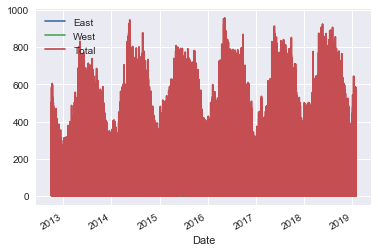

In [5]:
data.plot()

#### To see it a little better we can resample weekly and take the sum - we are going to take the total number of rides each week over the course of these years.

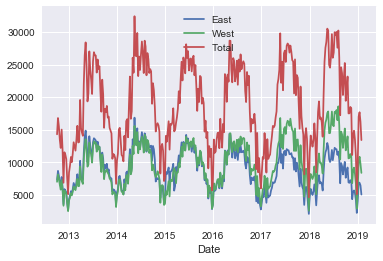

In [6]:
data.resample('W').sum().plot();

#### To see if there are trends like annual growth or decline in ridership we can do a rolling window
##### Lets resample daily and do a rolling sum over 365 days and what comes out is the annual trend

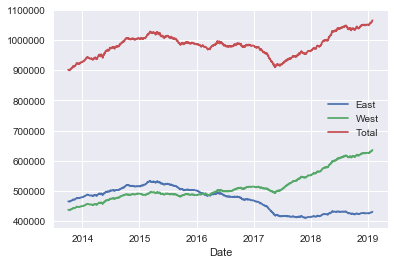

In [7]:
data.resample('D').sum().rolling(365).sum().plot();

#### These axes limits are a little bit suspect because they do not go all the way to zero.
#### If might be better if we can set the Y limit from 0 to None (use the current maximum). This will allow us to better see what's going on

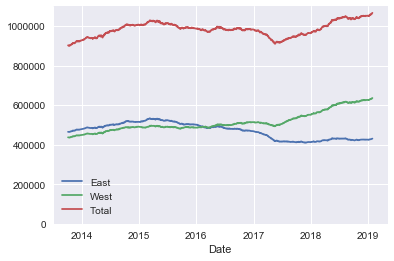

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

##### We can take a look at the trend within individual days, use grouping and the daily mean. Note: the index was set to date earlier using pandas

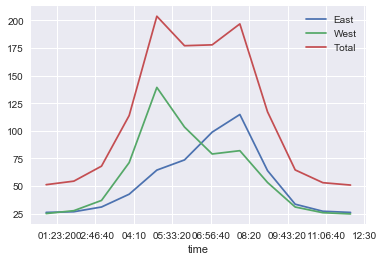

In [9]:
data.groupby(data.index.time).mean().plot();

### People going into the city on the east side in the morning and out of the city on the west side in the afternoon

### This average is nice but it would also be nice to see the whole data set in this way, and one way we can do that is by using a Pivot Table

#### Lets look at the first 5 by 5 block of the pivot table
##### Each column is a day in the dataset and each row corresponds to an hour during that day

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
01:00:00,50.0,64.5,60.0,96.0,122.5
02:00:00,65.0,64.0,66.0,106.0,122.0
03:00:00,84.5,75.0,84.0,107.0,118.5
04:00:00,161.0,141.5,159.5,94.0,114.0
05:00:00,307.0,266.5,229.5,92.5,100.0


#### Lets take a look at the pivot table
##### We have a line for each day of the 6 years

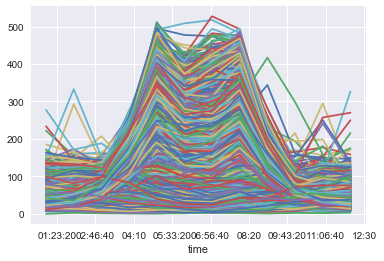

In [11]:
pivoted.plot(legend=False);

#### Lets introduce the transparancy where we plot a whole lot of transtarant lines on top or each other to get a trent in crossings of the day changes throughout this six year period

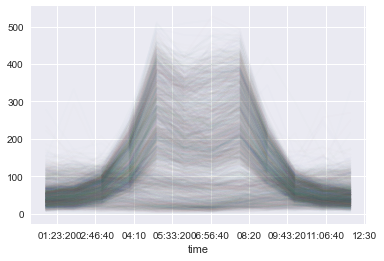

In [12]:
pivoted.plot(legend=False, alpha=0.01);

##### Now you see there are a bunch of days that have this bimodal commute pattern but there are days that do not have the commute pattern, they peak during mid-day and go down over the rest of the day. The best hypothesis is work days vrs week days/holidays